In [1]:
import math
import numpy as np

np.set_printoptions(3, suppress=True)
te =3                                                      #total elements
tn = te+1                                                  #total nodes
B=4000
H=3000

xco = [0,0,B,B]                                                   #x co ordinate of nodes
yco = [0,H,H,0]                                                   #y co ordinate of nodes

I= 50*(10**6)
E=210*(10**3)
A=2*(10**4)

snofel= [1,2,3]                                                   #start node of elements
enofel= [2,3,4]                                                   #end node of elements

lenofel = []                                                  #length of the element
cosofel = []                                                  #cos of element
sinofel = []                                                  #sin of element
elstmat = []                                                  #element stiffness matrix

for i in range(te):  
    a = snofel[i]
    b = enofel[i]
    x1 = float(xco[a-1])
    y1 = float(yco[a-1])
    x2 = float(xco[b-1])
    y2 = float(yco[b-1])
    L= math.sqrt((x2-x1)**2+(y2-y1)**2)
    cos = (x2-x1)/L
    sin = (y2-y1)/L
    mat =E*I*np.array([[    A/(L*I),          0,          0,     -A/(L*I),         0 ,       0   ],
                      [        0,   12/(L**3) ,     6/(L**2),          0,   -12/(L**3),  6/(L**2)   ],
                      [        0,    6/(L**2) ,        4/L,          0,    -6/(L**2),     2/L   ],
                      [   -A/(L*I),          0,          0,      A/(L*I),          0,       0   ],
                      [        0,   -12/(L**3),    -6/(L**2),          0,    12/(L**3),   -6/(L**2) ],
                      [        0,   6/(L**2)  ,        2/L,          0,    -6/(L**2),      4/L  ]])
    cosofel.append(cos)
    sinofel.append(sin)
    snofel.append(a)
    enofel.append(b)
    lenofel.append(L)
    elstmat.append(mat)
print()
trns=[]    
for i in range(te):
    DC=np.array([[  cosofel[i]  ,  sinofel[i]   ,  0],
                 [ -sinofel[i]  ,  cosofel[i]   ,  0], 
                 [           0  ,           0   ,  1]]) 
    T=np.zeros((3*2,3*2))
    for i in range(3*2):
        for j in range(3*2):
            if i<3:
                if j<3:
                    T[i,j]=DC[i,j]
            if i>2:
                if j>2:
                    T[i,j]=DC[i-3,j-3]
    trns.append(T)
    
Ttrns=[]
for i in range(te):
    C=trns[i].T
    Ttrns.append(C)
KG=[]
for i in range(te):
    A=np.matmul(Ttrns[i],elstmat[i])
    B=np.matmul(A,trns[i])
    KG.append(B)
#print(KG)    
gstmatmap = []

for i in range(te):                    
    m = snofel[i]*3                     
    n = enofel[i]*3                     
    add = [m-2,m-1, m,n-2, n-1, n]
    
    gmat = np.zeros((tn*3, tn*3))    ## global stiffness matrix loaded with zeros for element(i)
    elmat =KG[i]                  ## taking the element stiffness matrix of element(i)
    for j in range(6):                  
        for k in range(6):              
            a = add[j]-1                ## addressing row of GST matrix for element(i)
            b = add[k]-1                ## addressing column of GST matrix for element(i)
            gmat[a,b] =elmat[j,k]      ## updating the values in GST matrix with EST matrix of element(i)
    gstmatmap.append(gmat)              ## storing the resultant matrix in gstmatmap list
##    print(numpy.around(gmat, 3))

GSM = np.zeros((tn*3, tn*3))         ## creating an empyty GSM matrix
for mat in gstmatmap:
    GSM = GSM+mat
print("Global Stiffness Matrix of Structure: \n\n  ")    
print(GSM)    
    


Global Stiffness Matrix of Structure: 

  
[[ 4.667e+03  0.000e+00 -7.000e+06 -4.667e+03  0.000e+00 -7.000e+06
   0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00]
 [ 0.000e+00  1.400e+06  0.000e+00  0.000e+00 -1.400e+06  0.000e+00
   0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00]
 [-7.000e+06  0.000e+00  1.400e+10  7.000e+06  0.000e+00  7.000e+09
   0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00]
 [-4.667e+03  0.000e+00  7.000e+06  1.055e+06  0.000e+00  7.000e+06
  -1.050e+06  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00]
 [ 0.000e+00 -1.400e+06  0.000e+00  0.000e+00  1.402e+06  3.938e+06
   0.000e+00 -1.969e+03  3.938e+06  0.000e+00  0.000e+00  0.000e+00]
 [-7.000e+06  0.000e+00  7.000e+09  7.000e+06  3.938e+06  2.450e+10
   0.000e+00 -3.938e+06  5.250e+09  0.000e+00  0.000e+00  0.000e+00]
 [ 0.000e+00  0.000e+00  0.000e+00 -1.050e+06  0.000e+00  0.000e+00
   1.055e+06  0.000e+00  7.000e+06 -4.667e+03  0.000e+00  7.000e+0

In [2]:
dispmat =np.ones((tn*3,1))
dispmat[0,0]=0
dispmat[1,0]=0
dispmat[2,0]=0
dispmat[9,0]=0
dispmat[10,0]=0
dispmat[11,0]=0
#print(dispmat)

In [3]:
forcemat = np.zeros((tn*3,1))
forcemat[3,0]=-20000
forcemat[8,0]=12*(10**6)
#print(forcemat)


In [4]:
rcdlist = []
for i in range(tn*3):
    if dispmat[i,0] == 0:
        rcdlist.append(i)

rrgsm = np.delete(GSM, rcdlist, 0) #row reduction
crgsm = np.delete(rrgsm, rcdlist, 1) #column reduction
rgsm = crgsm #reduced global stiffness matrix
rforcemat = np.delete(forcemat, rcdlist, 0) #reduced force mat
rdispmat = np.delete(dispmat, rcdlist, 0) #reduced disp mat



dispresult = np.matmul(np.linalg.inv(rgsm), rforcemat)
rin = 0
for i in range(tn*3):
    if dispmat[i,0] == 1:
        dispmat[i,0] = dispresult[rin,0]
        rin = rin+1
#print(dispmat)

forceresult = np.matmul(GSM, dispmat)
#print(forceresult)
#print(rforcemat)

print("\n\n\n\nHorizontal displacement at node 2 is  %f mm" % dispmat[3,0])
print("\n\n\n\nVertical displacement at node 2 is  %f mm" % dispmat[4,0])
print("\n\n\n\nRotations at nodes 2 is  %f rad" % dispmat[5,0])

print("\n\n\n\nHorizontal displacement at node 3 is  %f mm" % dispmat[6,0])
print("\n\n\n\nVertical displacement at node 3 is  %f mm" % dispmat[7,0])
print("\n\n\n\nRotations at nodes 3 is  %f rad" % dispmat[8,0])

print("\n\n\n\nHorizontal Reactions at nodes 1 is  %f KN" % (forceresult[0,0]/1000))
print("\n\n\n\nVertical Reactions at nodes 1 is  %f KN" % (forceresult[1,0]/1000))
print("\n\n\n\nMoment at nodes 1 is  %f KNm" % (forceresult[2,0]/1000000))

print("\n\n\n\nHorizontal Reactions at nodes 4 is  %f KN" % (forceresult[9,0]/1000))
print("\n\n\n\nVertical Reactions at nodes 4 is  %f KN" % (forceresult[10,0]/1000))
print("\n\n\n\nMoment at nodes 4 is  %f KNm" % (forceresult[11,0]/1000000))





Horizontal displacement at node 2 is  -3.786704 mm




Vertical displacement at node 2 is  -0.006133 mm




Rotations at nodes 2 is  0.000783 rad




Horizontal displacement at node 3 is  -3.779265 mm




Vertical displacement at node 3 is  0.006133 mm




Rotations at nodes 3 is  0.001404 rad




Horizontal Reactions at nodes 1 is  12.189707 KN




Vertical Reactions at nodes 1 is  8.586518 KN




Moment at nodes 1 is  -21.025349 KNm




Horizontal Reactions at nodes 4 is  7.810293 KN




Vertical Reactions at nodes 4 is  -8.586518 KN




Moment at nodes 4 is  -16.628578 KNm


In [5]:
U=[]
u1=np.array([[dispmat[0,0]],[dispmat[1,0]],[dispmat[2,0]],[dispmat[3,0]],[dispmat[4,0]],[dispmat[5,0]]])
uu1=np.matmul(trns[0],u1)
U.append(uu1)
u2=np.array([[dispmat[3,0]],[dispmat[4,0]],[dispmat[5,0]],[dispmat[6,0]],[dispmat[7,0]],[dispmat[8,0]]])
uu2=np.matmul(trns[1],u2)
U.append(uu2)
u3=np.array([[dispmat[6,0]],[dispmat[7,0]],[dispmat[8,0]],[dispmat[9,0]],[dispmat[10,0]],[dispmat[11,0]]])
uu3=np.matmul(trns[2],u3)
U.append(uu3)


F=[]
f1=np.matmul(elstmat[0],uu1)
F.append(f1)
f2=np.matmul(elstmat[1],uu2)
F.append(f2)
f3=np.matmul(elstmat[2],uu3)
F.append(f3)
#print(F)

C:\Users\SAGAR\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


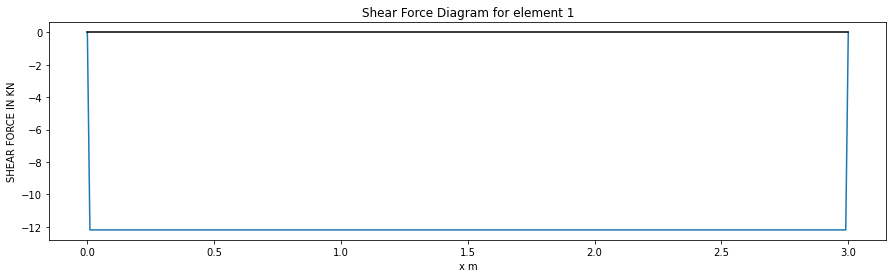

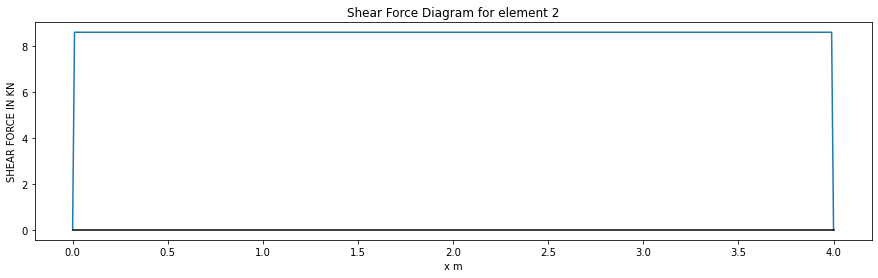

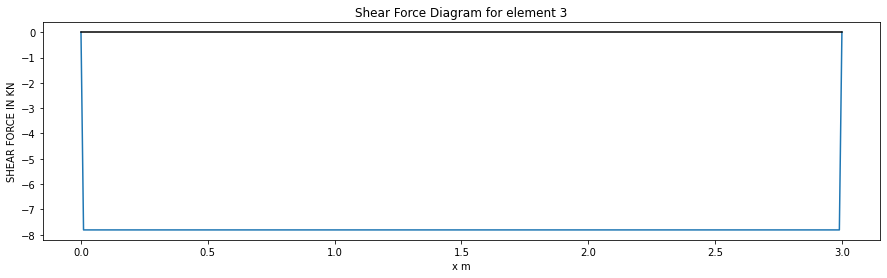

In [6]:

for i in range(te):
    XX=[]
    SF=[]
    FF=F[i]
    L=lenofel[i]/10
    for j in range(int(L+1)):
        if j==0:
            TT=0
        if  j==int(L):
            TT=0
        if j>0 and j<int(L):
            TT=FF[1]/1000
        XX.append(j/100)
        SF.append(TT)   
    from matplotlib import pyplot as plt
    plt.figure(figsize=(15,4))
    plt.plot(XX,SF)
    plt.plot([0]*(int(L/100)+1), color='k')
    plt.title('Shear Force Diagram for element '+str(i+1)+'')
    plt.xlabel('x m')
    plt.ylabel('SHEAR FORCE IN KN')
        

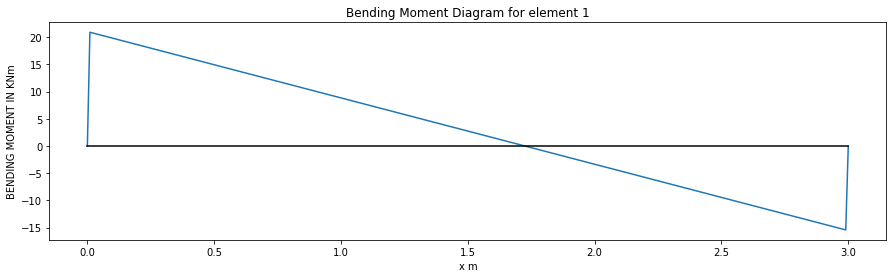

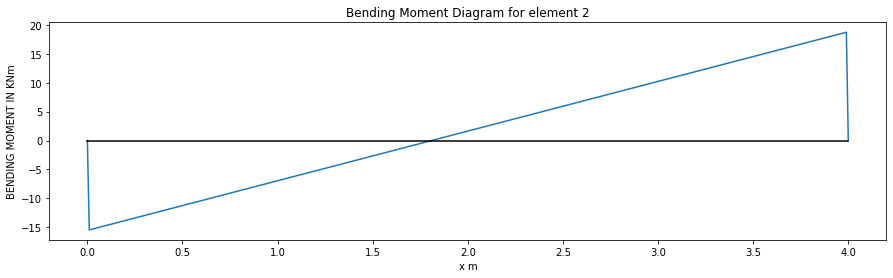

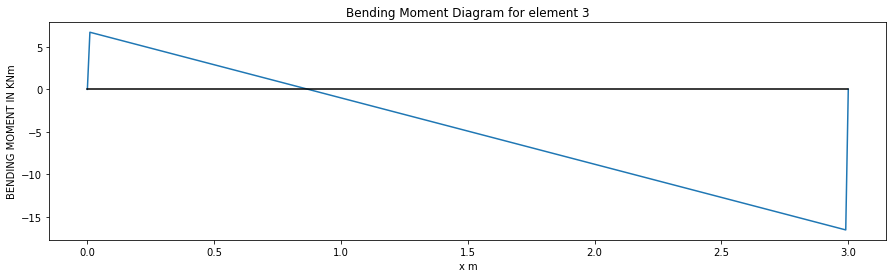

In [7]:
for i in range(te):
    XX=[]
    BM=[]
    FF=F[i]
    L=lenofel[i]/10
    for j in range(int(L+1)):
        if j==0:
            MM=0
        if  j==int(L):
            MM=0
        if j>0 and j<int(L):
            MM=-(FF[2]/1000000)+(FF[1]/1000)*(j/100)
        XX.append(j/100)
        BM.append(MM)   
    from matplotlib import pyplot as plt
    plt.figure(figsize=(15,4))
    plt.plot(XX,BM)
    plt.plot([0]*(int(L/100)+1), color='k')
    plt.title('Bending Moment Diagram for element '+str(i+1)+'')
    plt.xlabel('x m')
    plt.ylabel('BENDING MOMENT IN KNm')
        